In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_path = 'D:\HDD Giovanni\Desktop\dataset_new_FEATURES\dataset_train.xlsx'
val_path = 'D:\HDD Giovanni\Desktop\dataset_new_FEATURES\dataset_val.xlsx'
test_path = 'D:\HDD Giovanni\Desktop\dataset_new_FEATURES\dataset_test.xlsx'

In [3]:
train_df = pd.read_excel(train_path)
val_df = pd.read_excel(val_path)
test_df = pd.read_excel(test_path)

In [4]:
len(train_df.columns)

31

In [5]:
X_train = train_df.drop(['path','dimensions', 'label'], axis=1)
y_train = train_df['label']

X_val = val_df.drop(['path','dimensions', 'label'], axis=1)
y_val = val_df['label']

X_test = test_df.drop(['path','dimensions', 'label'], axis=1)
y_test = test_df['label']

In [6]:
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (18537, 28), (18537,)
Validation set shape: (2058, 28), (2058,)
Test set shape: (2468, 28), (2468,)


In [7]:
X_train.isna().sum()

mean_intensity                 0
std_intensity                  0
contrast_0                     0
contrast_45                    0
contrast_90                    0
contrast_135                   0
dissimilarity_0                0
dissimilarity_45               0
dissimilarity_90               0
dissimilarity_135              0
homogeneity_0                  0
homogeneity_45                 0
homogeneity_90                 0
homogeneity_135                0
energy_0                       0
energy_45                      0
energy_90                      0
energy_135                     0
correlation_0                  0
correlation_45                 0
correlation_90                 0
correlation_135                0
mean_area                      0
max_solidity                   0
mean_equivalent_diameter       0
mean_perimeter                 0
mean_irregularity_index     4248
mean_convex_area               0
dtype: int64

In [8]:
# Sostituisci np.inf e -np.inf con np.nan
X_train['mean_irregularity_index'].replace([np.inf, -np.inf], np.nan, inplace=True)
X_val['mean_irregularity_index'].replace([np.inf, -np.inf], np.nan, inplace=True)
X_test['mean_irregularity_index'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Calcola il 50° percentile dalla colonna del training set
percentile_50 = X_train['mean_irregularity_index'].describe()['50%']

# Sostituisci i NaN nella colonna con il valore del 50° percentile
X_train['mean_irregularity_index'].fillna(percentile_50, inplace=True)
X_val['mean_irregularity_index'].fillna(percentile_50, inplace=True)
X_test['mean_irregularity_index'].fillna(percentile_50, inplace=True)

# Conferma che i NaN sono stati sostituiti
print(X_train['mean_irregularity_index'].isna().sum())
print(X_val['mean_irregularity_index'].isna().sum())
print(X_test['mean_irregularity_index'].isna().sum())

0
0
0


In [9]:
#check NaN
X_train.isna().sum()
X_val.isna().sum()
X_test.isna().sum()

mean_intensity              0
std_intensity               0
contrast_0                  0
contrast_45                 0
contrast_90                 0
contrast_135                0
dissimilarity_0             0
dissimilarity_45            0
dissimilarity_90            0
dissimilarity_135           0
homogeneity_0               0
homogeneity_45              0
homogeneity_90              0
homogeneity_135             0
energy_0                    0
energy_45                   0
energy_90                   0
energy_135                  0
correlation_0               0
correlation_45              0
correlation_90              0
correlation_135             0
mean_area                   0
max_solidity                0
mean_equivalent_diameter    0
mean_perimeter              0
mean_irregularity_index     0
mean_convex_area            0
dtype: int64

In [10]:
duplval = X_train.duplicated() #controllo
print("Duplicati nel DataFrame:", duplval.sum()) #printa duplicati se presenti
eliminadupl = X_train.drop_duplicates() #elimina i duplicati se

Duplicati nel DataFrame: 0


In [11]:
from sklearn.preprocessing import StandardScaler

# Crea lo scaler
scaler = StandardScaler()

# Adatta lo scaler solo sulle features di training e trasforma le features di training
X_train_scaled = scaler.fit_transform(X_train)

# Utilizza lo scaler adattato per trasformare le features di validation e di test
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import joblib

In [13]:
X_test_scaled

array([[-1.29612564, -0.83502543, -0.43839321, ..., -0.93012609,
         0.0872821 , -0.89268144],
       [-0.45505798, -0.142056  , -0.57199246, ..., -0.51842919,
        -0.13412631, -0.65521244],
       [-0.75193505, -0.84655759, -0.60111557, ..., -1.12674314,
        -0.37368346, -0.92127166],
       ...,
       [-0.810902  , -2.03646004, -0.75150531, ..., -1.18391822,
        -2.63288578, -0.92460576],
       [-0.94278356, -1.84948848, -0.56157979, ..., -1.18391822,
        -2.63288578, -0.92460576],
       [-0.16434637, -1.07101931, -0.27595773, ..., -0.71591241,
         0.03743695, -0.71684376]])

In [14]:
# Definisci il modello e i parametri per la grid search
# Definisci il modello base SVC
svc = SVC(random_state=42)

#  parametri da testare
param_grid = {
    'C': [0.1, 1, 10],  # Valori esemplificativi di C
    'gamma': [ 'auto', 0.1, 1],  # Valori esemplificativi di gamma
    'kernel': ['rbf', 'linear']  # Tipi di kernel da testare
}

# Configura GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Esegui la ricerca degli iperparametri
grid_search.fit(X_train_scaled, y_train)


# Ottieni il miglior modello trovato dalla ricerca
best_svc = grid_search.best_estimator_
best_params_svc = grid_search.best_params_

# Salva il modello su disco
joblib.dump(best_svc, 'best_svc_model.joblib')

# Valuta il miglior modello sul set di validation
val_predictions = best_svc.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f'Validation Accuracy: {val_accuracy*100:.2f}%')

print(best_params_svc)
print(best_svc)



Fitting 5 folds for each of 18 candidates, totalling 90 fits
Validation Accuracy: 70.21%
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1, random_state=42)


In [15]:
# Valuta il miglior modello sul set di test
SVM_predictions = best_svc.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, SVM_predictions)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

Test Accuracy: 68.44%


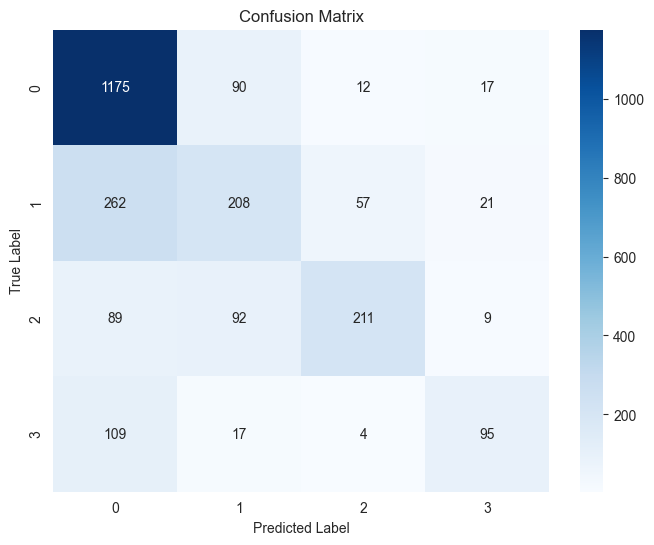

In [16]:
#print confusion matrix e precision recall f1 ecc
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcola la confusion matrix
cm = confusion_matrix(y_test, SVM_predictions)
cm

# Visualizza la confusion matrix con Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1','2','3'], yticklabels=['0', '1','2','3'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


In [17]:
#precision recall f1
from sklearn.metrics import precision_score, recall_score, f1_score

# Calcola precision, recall e f1 score basandosi sui valori fittizi
precision = precision_score(y_test, SVM_predictions, average='weighted')
recall = recall_score(y_test, SVM_predictions, average='weighted')
f1 = f1_score(y_test, SVM_predictions, average='weighted')

print(f'Precision: {precision*100:.2f}%')
print(f'recall: {recall*100:.2f}%')
print(f'f1: {f1*100:.2f}%')


Precision: 67.20%
recall: 68.44%
f1: 66.47%


In [20]:
import shap
# explainer SHAP
explainer = shap.TreeExplainer(best_svc)

# Calcola i valori SHAP per il set di test
shap_values = explainer.shap_values(X_test_scaled)

# Plot summary plot with all features
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar", max_display=28, feature_names=X_test.columns)
#plt.savefig('D:\HDD Giovanni\Desktop\shap_plot_RF.jpeg', dpi=300)

InvalidModelError: Model type not yet supported by TreeExplainer: <class 'sklearn.svm._classes.SVC'>

In [19]:
best_svc

SVC(C=10, gamma=0.1, random_state=42)

In [21]:
# Utilizza KernelExplainer
explainer = shap.KernelExplainer(best_svc.predict, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)

# Plot summary plot with all features
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar", max_display=28, feature_names=X_test.columns)

Using 18537 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/2468 [00:00<?, ?it/s]

KeyboardInterrupt: 